In [1]:
import numpy as np
import scipy
import scipy.spatial

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_theme(style="white", palette="pastel")

## Aula 01 - Qualidade do modelo de clusterização

### Exemplo 01 - USArrests

In [95]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

In [96]:
df = pd.read_csv("USArrests.csv", sep=',', index_col=0)
df.head(6)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


### Escolha do número de clusters

In [97]:
normalized_df = (df-df.mean())/df.std()
normalized_df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.242564,0.782839,-0.520907,-0.003416
Alaska,0.507862,1.106823,-1.211764,2.484203
Arizona,0.071633,1.478803,0.998980,1.042878
Arkansas,0.232349,0.230868,-1.073593,-0.184917
California,0.278268,1.262814,1.758923,2.067820


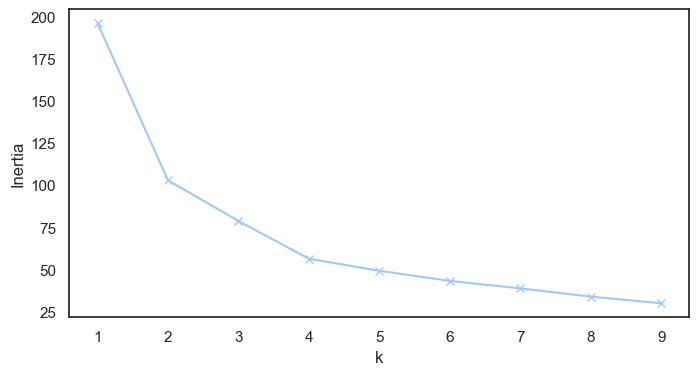

In [98]:
def plot_inertia(df, kmin=1, kmax=10, figsize=(8, 4)):

    _range = range(kmin, kmax)
    inertias = []
    for k in _range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=figsize)
    plt.plot(_range, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()
    
plot_inertia(normalized_df)

### Clustering

In [99]:
kmeans = KMeans(n_clusters=4, random_state=42)
k_fit = kmeans.fit(normalized_df)

In [100]:
cluster_df = df.copy()
cluster_df['cluster'] = k_fit.labels_
cluster_df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2


In [101]:
cluster_df.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,5.656250,138.875000,73.875000,18.781250
1,13.937500,243.625000,53.750000,21.412500
2,10.815385,257.384615,76.000000,33.192308
3,3.600000,78.538462,52.076923,12.176923


In [102]:
def plot_cluster_points(df, labels, ax=None, hue="cluster", legend="auto"):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['cluster'] = pd.Categorical(labels)
    sns.scatterplot(x="PC1", y="PC2", hue=hue, data=pca_data, ax=ax, legend=legend)

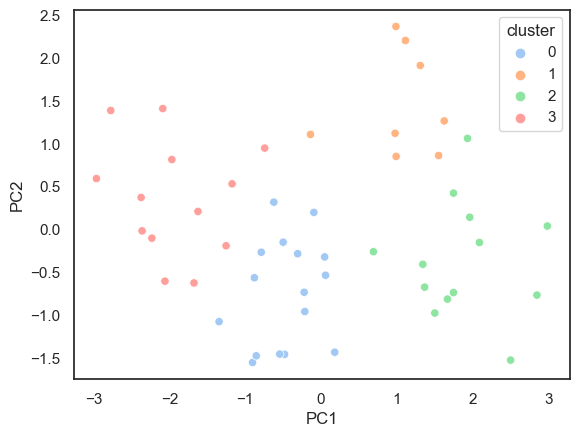

In [103]:
plot_cluster_points(normalized_df, kmeans.labels_)

### Qualidade

#### Cardinalidade

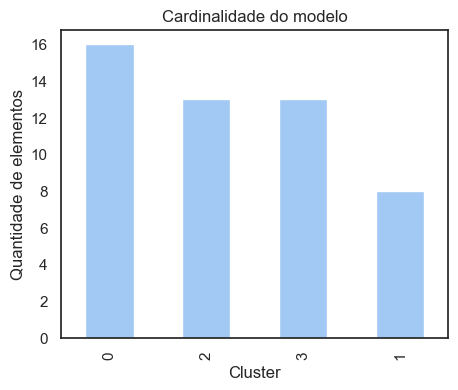

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
cluster_df['cluster'].value_counts().plot(kind='bar', ax=ax)
ax.set_title('Cardinalidade do modelo')
ax.set_xlabel('Cluster')
ax.set_ylabel('Quantidade de elementos');

# Magnitude

In [105]:
k_fit.transform(normalized_df)

array([[2.37225548, 0.35180502, 1.88449114, 3.08602411],
       [3.73473006, 2.66552199, 2.28888175, 4.36427409],
       [2.37917703, 2.54916222, 0.8443117 , 3.93850223],
       [1.9036288 , 1.38353736, 2.49627046, 1.96113982],
       [3.18165384, 3.50074064, 1.3867231 , 4.85703995],
       [2.34089518, 2.89151905, 1.10600637, 3.80357193],
       [1.06389057, 3.5111343 , 3.41659688, 1.7678184 ],
       [1.23934857, 2.31487351, 2.20274983, 2.44626459],
       [3.56143756, 2.42021516, 1.43901313, 4.99655533],
       [3.08211171, 1.09137529, 2.10714056, 3.87042849],
       [1.29190903, 3.69545896, 3.19299862, 2.36695708],
       [1.63348032, 3.09346785, 3.56329646, 0.60376859],
       [1.9079475 , 2.19626789, 1.10284266, 3.57471738],
       [0.80874921, 2.33573886, 2.44184836, 1.59330124],
       [1.90151069, 3.68063665, 4.11560107, 0.54854696],
       [0.62550026, 2.55973963, 2.69250069, 1.34416722],
       [1.82880635, 1.96689278, 3.03934596, 1.51290394],
       [2.67956242, 0.9166257 ,

In [106]:
np.min(k_fit.transform(normalized_df), axis=1)

array([0.35180502, 2.28888175, 0.8443117 , 1.38353736, 1.3867231 ,
       1.10600637, 1.06389057, 1.23934857, 1.43901313, 1.09137529,
       1.29190903, 0.60376859, 1.10284266, 0.80874921, 0.54854696,
       0.62550026, 1.51290394, 0.9166257 , 0.5876881 , 0.99594552,
       0.87111563, 0.38520533, 1.02888386, 0.97275603, 1.23976601,
       0.80286377, 0.88774179, 1.44719294, 0.5835578 , 1.14475608,
       0.55968121, 1.02789529, 1.41026343, 1.07596854, 0.52719605,
       0.49978677, 1.25509208, 0.60493825, 1.58758046, 0.60227912,
       0.50357481, 0.97415519, 1.18145388, 0.86124991, 1.47388195,
       1.03679518, 0.88375263, 1.06951713, 1.04568579, 1.08334969])

In [107]:
np.min(k_fit.transform(normalized_df), axis=1).sum()

49.81730941618923

In [108]:
(np.min(k_fit.transform(normalized_df), axis=1)**2).sum()

56.40317345829281

In [109]:
kmeans.inertia_

56.40317345829282

In [110]:
mag_df = pd.DataFrame(
    zip(
        np.min(k_fit.transform(normalized_df), axis=1),
        k_fit.labels_
    ), columns=['distance_to_center', 'cluster']
)
mag_df.head()

,distance_to_center,cluster
0,0.351805,1
1,2.288882,2
2,0.844312,2
3,1.383537,1
4,1.386723,2


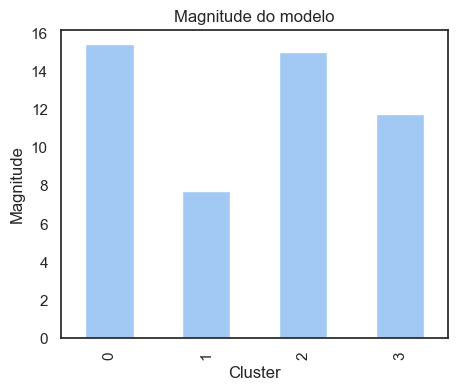

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
mag_df.groupby('cluster').sum()['distance_to_center'].plot(kind='bar', ax=ax)
ax.set_title('Magnitude do modelo')
ax.set_xlabel('Cluster')
ax.set_ylabel('Magnitude');

#### Relação entre ambas

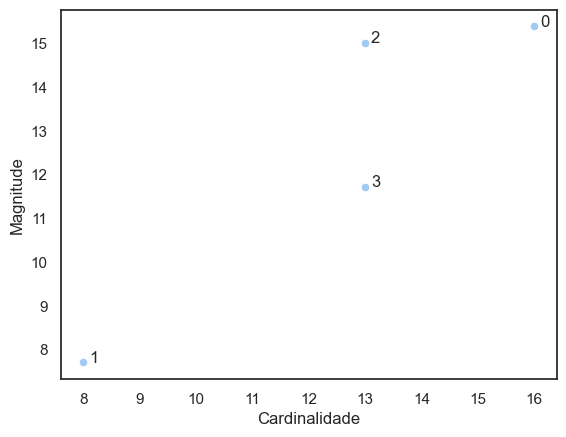

In [112]:
measures_df = pd.concat([
    cluster_df['cluster'].value_counts(),
    mag_df.groupby('cluster').sum()['distance_to_center']
], axis=1)
measures_df.columns = ['Cardinalidade', 'Magnitude']
ax = measures_df.plot.scatter(x='Cardinalidade', y='Magnitude')

# Annotate each data point
for idx, row in measures_df.iterrows():
    ax.annotate(idx, (row['Cardinalidade'] + 0.1, row['Magnitude']))

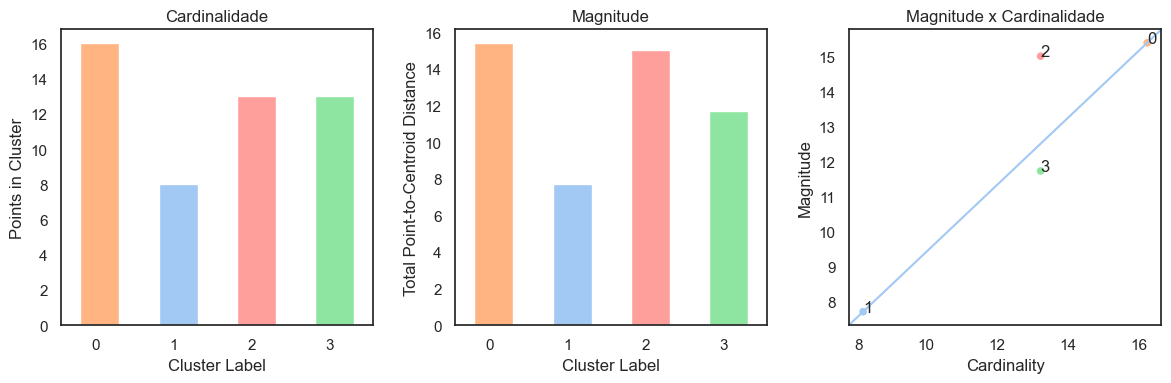

In [113]:
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))

cluster_colors = list(set(map(lambda x: '#000' if x == -1 else sns.color_palette().as_hex()[x], k_fit.labels_)))


plot_cluster_cardinality(k_fit.labels_,
                         ax=ax1,
                         title="Cardinalidade",
                         color=cluster_colors
                        )
plot_cluster_magnitude(normalized_df,
                       k_fit.labels_,
                       k_fit.cluster_centers_,
                       euclidean,
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors
                      )
plot_magnitude_vs_cardinality(normalized_df,
                              k_fit.labels_,
                              k_fit.cluster_centers_,
                              euclidean,
                              color=cluster_colors[0:k_fit.n_clusters],
                              ax=ax3, 
                              title="Magnitude x Cardinalidade")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()

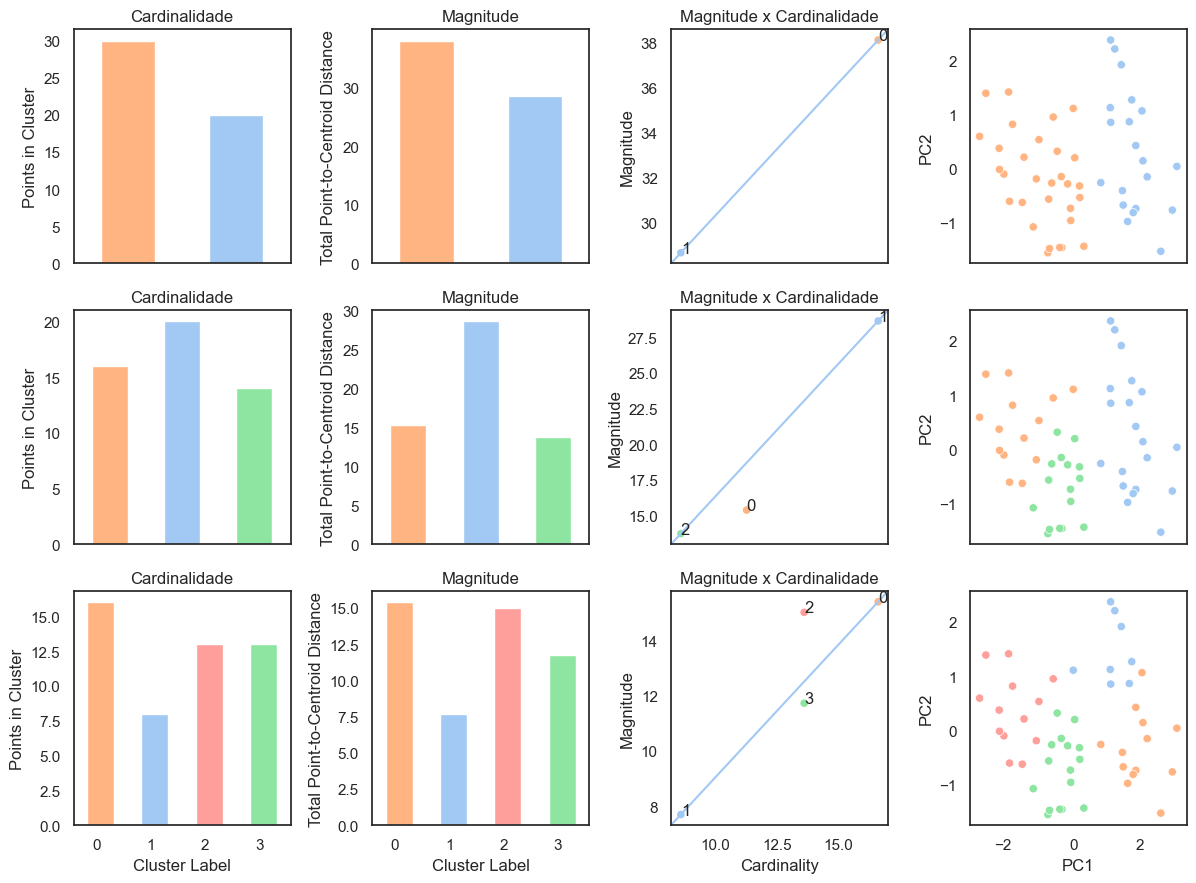

In [114]:
fig, axs = plt.subplots(3, 4, figsize=(12, 9))

for row_idx, k in enumerate([2, 3, 4]):
    
    row_axs = axs[row_idx]
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    k_fit = kmeans.fit(normalized_df)
    
    cluster_colors = list(set(map(lambda x: '#000' if x == -1 else sns.color_palette().as_hex()[x], k_fit.labels_)))

    plot_cluster_cardinality(k_fit.labels_,
                             ax=row_axs[0],
                             title="Cardinalidade",
                             color=cluster_colors
                            )
    plot_cluster_magnitude(normalized_df,
                           k_fit.labels_,
                           k_fit.cluster_centers_,
                           euclidean,
                           ax=row_axs[1],
                           title="Magnitude",
                           color=cluster_colors
                          )
    plot_magnitude_vs_cardinality(normalized_df,
                                  k_fit.labels_,
                                  k_fit.cluster_centers_,
                                  euclidean,
                                  color=cluster_colors[0:k_fit.n_clusters],
                                  ax=row_axs[2], 
                                  title="Magnitude x Cardinalidade")
    
    plot_cluster_points(normalized_df, k_fit.labels_, 
                        hue=list(map(lambda x: cluster_colors[x], k_fit.labels_)), legend=False, ax=row_axs[3])
    

fig.autofmt_xdate(rotation=0)
plt.tight_layout()

## Aula 02 - Medidas de Similaridade

### Extra! Correlação

In [192]:
corr_df = pd.Series(list(range(-100, 100))).to_frame()
corr_df.columns = ['x']
corr_df['x_linha'] = corr_df['x'].copy() + pd.Series(np.random.normal(0, 10, 200))
corr_df['x_2'] = corr_df['x']**2
corr_df.head(2)

,x,x_linha,x_2
0,-100,-99.200178,10000
1,-99,-111.390775,9801


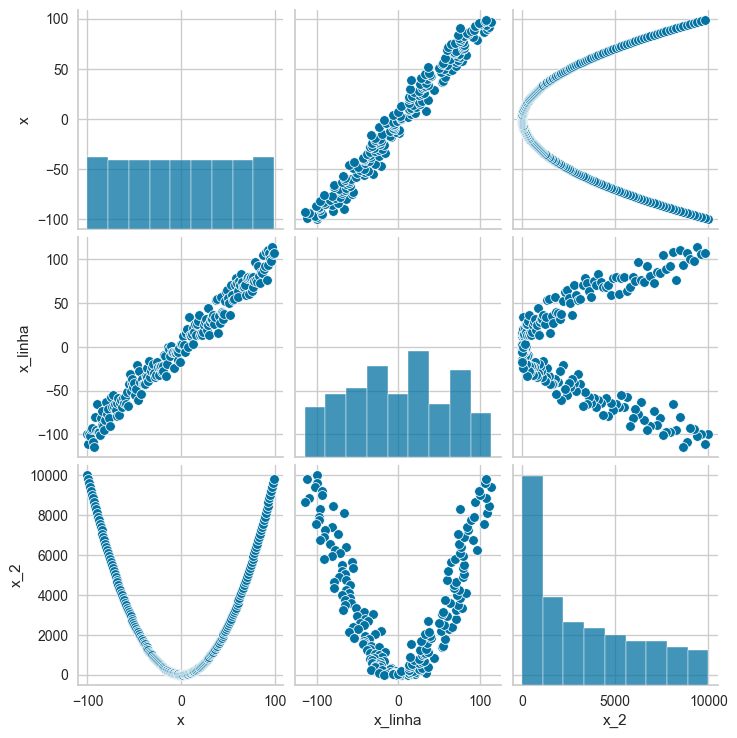

In [193]:
sns.pairplot(corr_df)

In [194]:
corr_df.corr()

,x,x_linha,x_2
x,1.000000,0.986478,-0.019362
x_linha,0.986478,1.000000,-0.017513
x_2,-0.019362,-0.017513,1.000000


### Normalização

<AxesSubplot:ylabel='Frequency'>

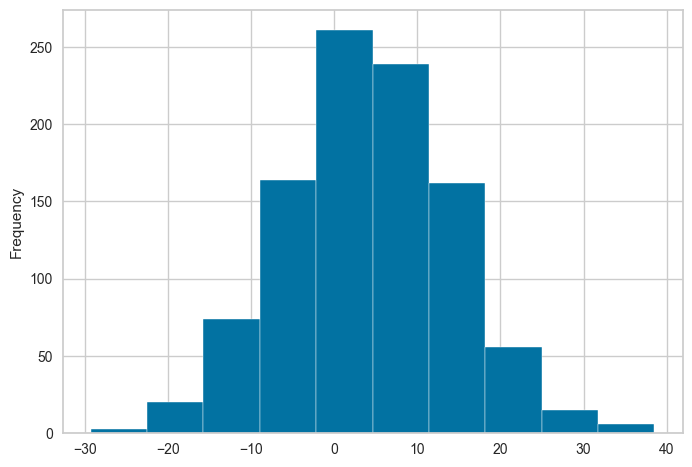

In [153]:
normal_series = pd.Series(np.random.normal(5, 10, 1000))
normal_series.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

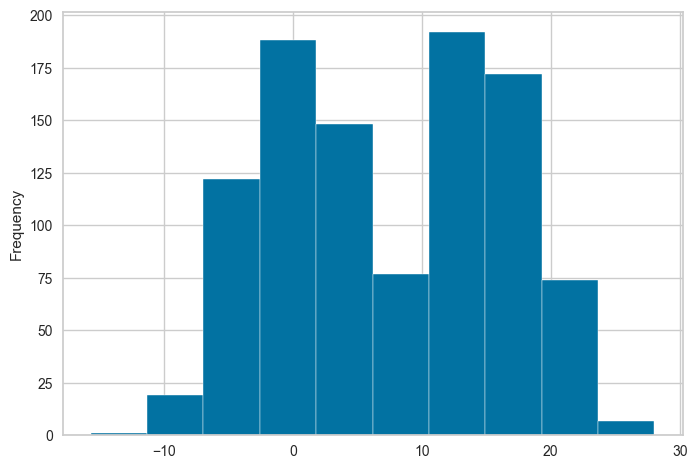

In [154]:
bimodal_series = pd.Series(np.concatenate([
    np.random.normal(0, 4, 500), 
    np.random.normal(15, 4, 500)
]))

bimodal_series.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

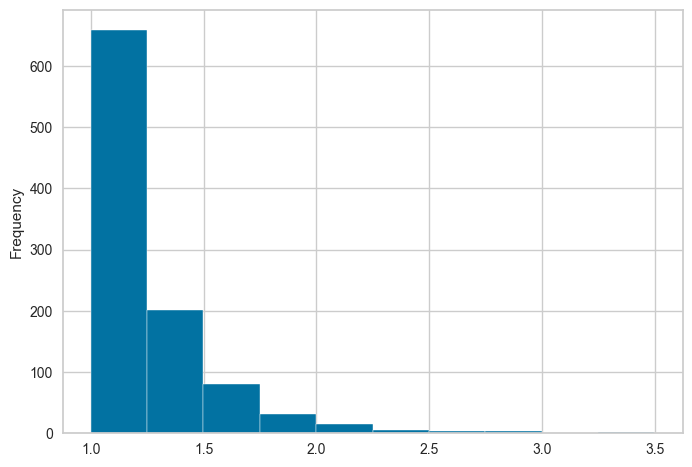

In [155]:
powerlaw_series = pd.Series(np.random.power(5, 1000))
powerlaw_series = 1 / powerlaw_series
powerlaw_series.plot(kind='hist')

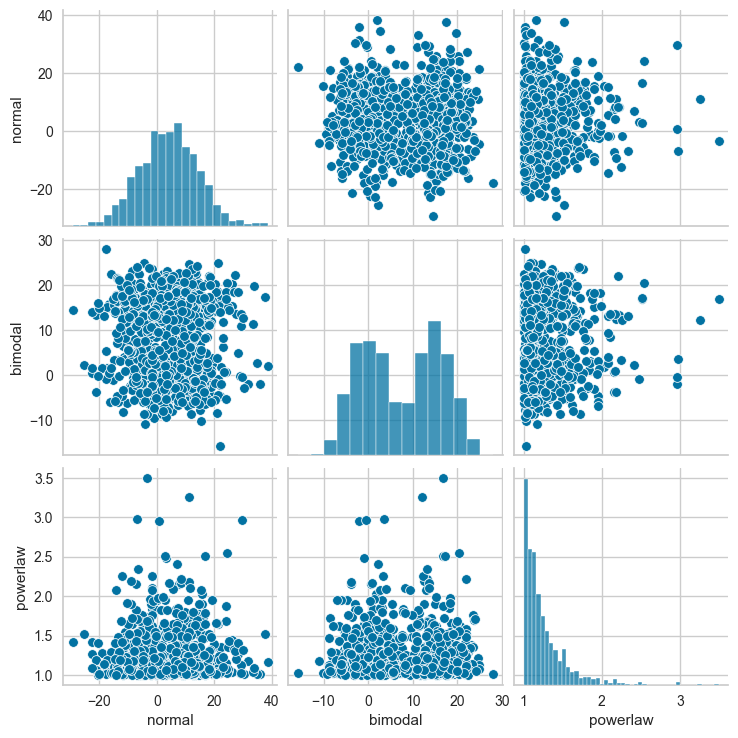

In [163]:
df = pd.DataFrame(
    pd.concat([normal_series, bimodal_series, powerlaw_series], axis=1),
)
df.columns=['normal', 'bimodal', 'powerlaw']
sns.pairplot(df)

In [195]:
df.corr()

,normal,bimodal,powerlaw,bimodal_quantile,normal_transf,bimodal_transf,powerlaw_transf
normal,1.000000,-0.007032,-0.007113,-0.006249,1.000000,-0.021577,-0.033141
bimodal,-0.007032,1.000000,0.000913,0.994056,-0.007032,0.981279,-0.016081
powerlaw,-0.007113,0.000913,1.000000,-0.001388,-0.007113,0.002219,0.856366
bimodal_quantile,-0.006249,0.994056,-0.001388,1.000000,-0.006249,0.978689,-0.019347
normal_transf,1.000000,-0.007032,-0.007113,-0.006249,1.000000,-0.021577,-0.033141
bimodal_transf,-0.021577,0.981279,0.002219,0.978689,-0.021577,1.000000,-0.014286
powerlaw_transf,-0.033141,-0.016081,0.856366,-0.019347,-0.033141,-0.014286,1.000000


In [174]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

df['normal_transf'] = StandardScaler().fit_transform(df[['normal']])

qt = QuantileTransformer(n_quantiles=10, output_distribution='normal')
df['bimodal_transf'] = StandardScaler().fit_transform(qt.fit_transform(df[['bimodal']]))

pt = PowerTransformer(method='box-cox', standardize=True)
df['powerlaw_transf'] = pt.fit_transform(df[['powerlaw']])

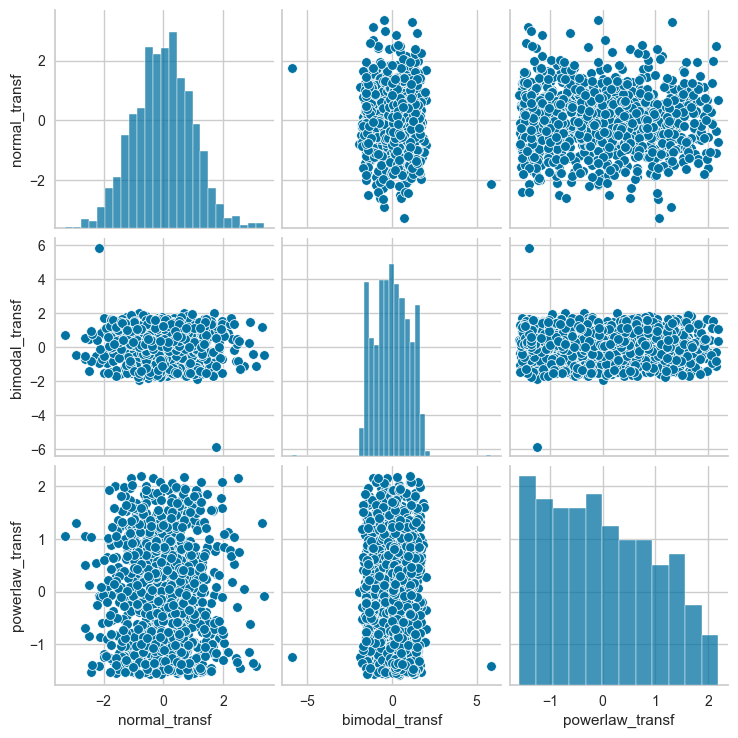

In [175]:
sns.pairplot(df[['normal_transf', 'bimodal_transf', 'powerlaw_transf']])

## Aula 03 - Correlação cruzada

Vamos ver alguns métodos de calcular sincronia entre séries temporais. Entre elas, a correlação cruzada.

In [ ]:
import scipy.stats as stats

### Pearson

In [261]:
df = pd.read_csv('synchrony_sample.csv')
overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r:.3g}")

Pandas computed Pearson r: 0.206


In [262]:
df.head()

,S1_Joy,S2_Joy
0,1.662181,0.611217
1,1.584762,0.697876
2,1.413029,1.198360
3,1.995480,0.950441
4,1.981835,0.669841


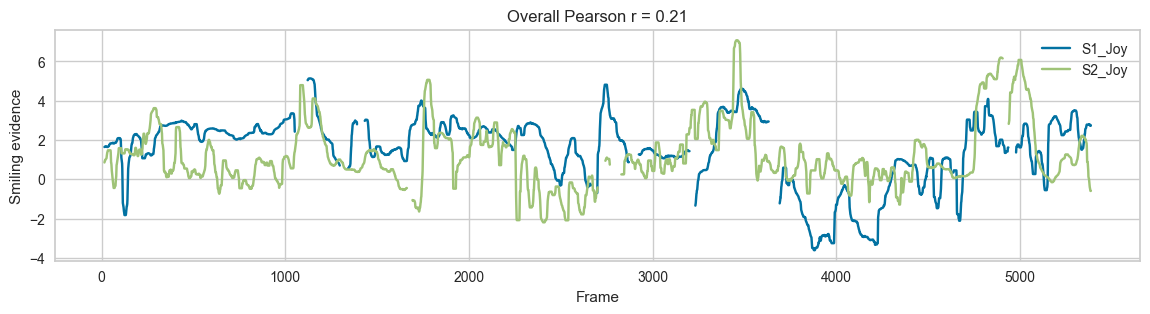

In [263]:
f, ax = plt.subplots(figsize=(14, 3))
df.rolling(window=30, center=True).median().plot(ax=ax)
ax.set(xlabel='Frame', ylabel='Smiling evidence', title=f"Overall Pearson r = {overall_pearson_r:.2g}");

<AxesSubplot:>

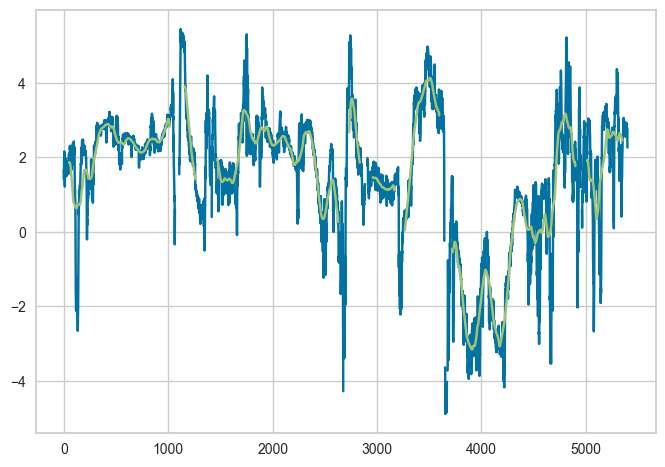

In [268]:
df['S1_Joy'].plot()
df['S1_Joy'].rolling(window=100, center=True).mean().plot()

Pearson pode ser calculado de maneiras mais local, com uma janela deslizante

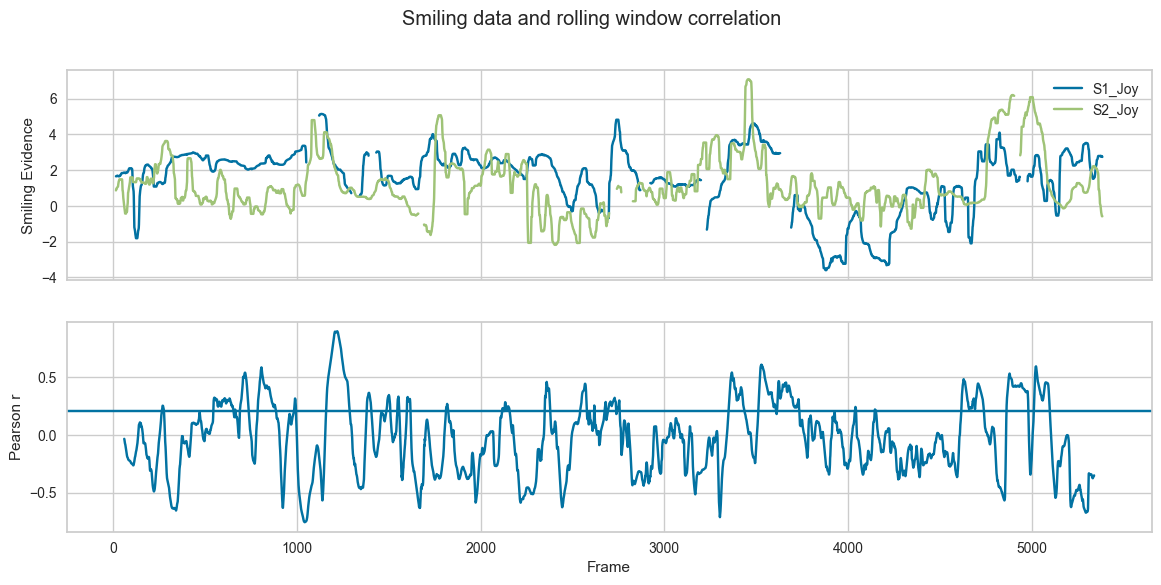

In [271]:
rolling_r = df.interpolate()['S1_Joy'].rolling(window=120, center=True).corr(df.interpolate()['S2_Joy'])
f, ax=plt.subplots(2, 1, figsize=(14,6), sharex=True)

df.rolling(window=30, center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame', ylabel='Smiling Evidence')

rolling_r.plot(ax=ax[1])
ax[1].axhline(overall_pearson_r)
ax[1].set(xlabel='Frame', ylabel='Pearson r')

plt.suptitle("Smiling data and rolling window correlation")
plt.show()

/Users/frias/Library/Caches/pypoetry/virtualenvs/code--i0r5fsL-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == "":


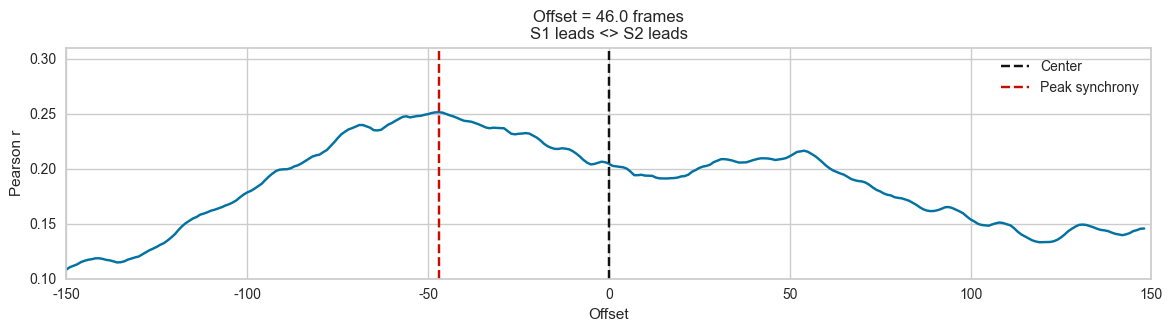

In [204]:
seconds = 5
fps = 30
rs = [df['S1_Joy'].corr(df['S2_Joy'].shift(lag)) for lag in range(-int(seconds*fps - 1), int(seconds*fps))]
offset = np.floor(len(rs)/2) - np.argmax(rs)

f, ax = plt.subplots(figsize=(14, 3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2), color='k', linestyle='--', label='Center')
ax.axvline(np.argmax(rs), color='r', linestyle='--', label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads', 
       ylim=[.1,.31], xlim=[0,300], xlabel='Offset', ylabel='Pearson r')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()])
plt.legend()

In [205]:
# Windowed time lagged cross correlation
seconds = 5
fps = 30
no_splits = 20
samples_per_split = df.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = df['S1_Joy'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = df['S2_Joy'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [d1.corr(d2.shift(lag)) for lag in range(-int(seconds*fps-1), int(seconds*fps))]
    rss.append(rs)
rss = pd.DataFrame(rss)
rss.head()

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
0,-0.583701,-0.581308,-0.577773,-0.569699,-0.561098,-0.554869,-0.545815,-0.534114,-0.520261,-0.507547,...,-0.186079,-0.164966,-0.139526,-0.095287,-0.044536,-0.006130,0.023919,0.054693,0.082426,0.113927
1,-0.504492,-0.533278,-0.554134,-0.573314,-0.584403,-0.591169,-0.596890,-0.604865,-0.610314,-0.615132,...,0.446255,0.452234,0.455733,0.472875,0.506034,0.535858,0.531509,0.507251,0.470921,0.439570
2,-0.226089,-0.230898,-0.233005,-0.239316,-0.256308,-0.236341,-0.238402,-0.255613,-0.236311,-0.222411,...,-0.151564,-0.191983,-0.216773,-0.262681,-0.316506,-0.364773,-0.422310,-0.488945,-0.558337,-0.600514
3,-0.010314,-0.018486,-0.039060,-0.069798,-0.097286,-0.133854,-0.177939,-0.209346,-0.249437,-0.288233,...,-0.187464,-0.185952,-0.172580,-0.132278,-0.086547,-0.034099,0.021679,0.069648,0.118964,0.144213
4,0.667971,0.721264,0.700723,0.688877,0.660212,0.588687,0.559989,0.484516,0.510639,0.450001,...,0.457690,0.454795,0.452496,0.445307,0.447232,0.446794,0.455309,0.459961,0.474135,0.485410


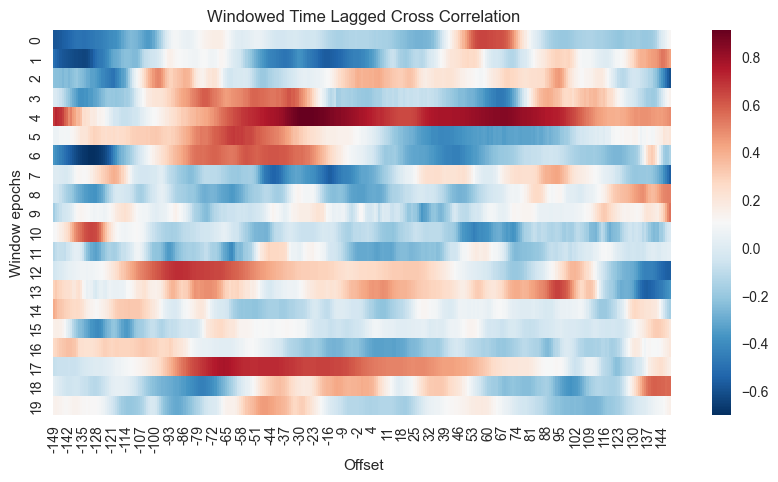

In [206]:
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(rss, cmap='RdBu_r', ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation', xlim=[0,300], xlabel='Offset', ylabel='Window epochs')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);

In [207]:
# Rolling window time lagged cross correlation
seconds = 5
fps = 30
window_size = 300 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 5400:
    d1 = df['S1_Joy'].iloc[t_start:t_end]
    d2 = df['S2_Joy'].iloc[t_start:t_end]
    rs = [d1.corr(d2.shift(lag)) for lag in range(-int(seconds*fps-1), int(seconds*fps))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)
rss.head()

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
0,-0.753894,-0.736806,-0.718835,-0.697696,-0.675711,-0.654704,-0.632600,-0.609790,-0.582291,-0.552375,...,-0.189951,-0.174245,-0.151882,-0.112186,-0.066321,-0.028653,0.003512,0.036478,0.066218,0.099076
1,-0.619976,-0.598037,-0.574863,-0.548889,-0.523805,-0.499425,-0.472647,-0.444414,-0.413862,-0.382215,...,-0.160822,-0.132290,-0.099132,-0.054828,-0.008294,0.031536,0.067085,0.102053,0.132699,0.162366
2,-0.608298,-0.590003,-0.571843,-0.552028,-0.533277,-0.514449,-0.492464,-0.468048,-0.440435,-0.410456,...,-0.073338,-0.056894,-0.035145,-0.003608,0.028833,0.058690,0.083331,0.111593,0.136823,0.164867
3,-0.470132,-0.446370,-0.420482,-0.389573,-0.354553,-0.321761,-0.295227,-0.277150,-0.262061,-0.247485,...,0.010234,0.011036,0.013426,0.019440,0.025733,0.024513,0.023911,0.021309,0.014018,0.004584
4,-0.429542,-0.413585,-0.395859,-0.371450,-0.341722,-0.314083,-0.295650,-0.284245,-0.277457,-0.273468,...,0.251416,0.244019,0.241902,0.240956,0.237714,0.233467,0.227776,0.218780,0.210346,0.202484


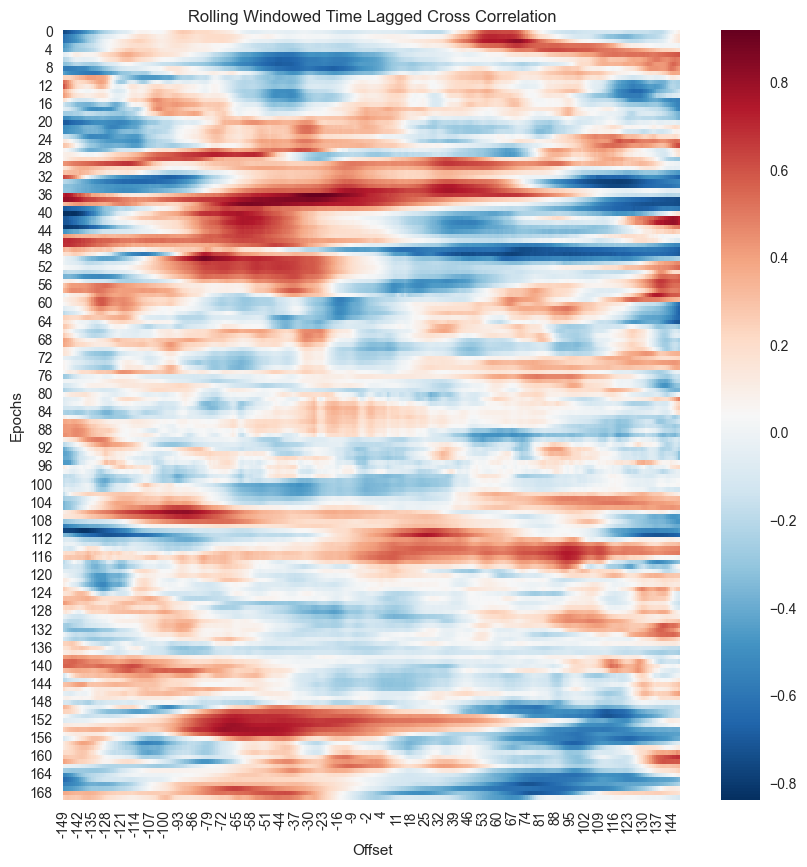

In [208]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss, cmap='RdBu_r', ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation', xlim=[0,300], xlabel='Offset', ylabel='Epochs')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);

### DTW

In [211]:
from dtw import dtw,accelerated_dtw

d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(
    df['S1_Joy'].interpolate().values, df['S2_Joy'].interpolate().values, dist='euclidean')

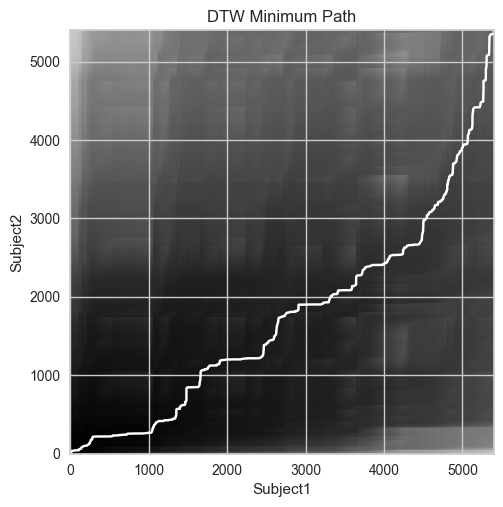

In [212]:
plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title('DTW Minimum Path')
plt.show()

### Caso de Estudo

In [278]:
from pandas_datareader.data import DataReader 

In [346]:
companies_dict = {
    'Petrobras': 'PETR4.SA',
    'Vale': 'VALE3.SA',
    'Oi': 'OIBR4.SA',
    'CSN': 'CSNA3.SA',
    'Banco do Brasil': 'BBAS3.SA',
    'Itaú': 'ITUB4.SA',
    'Eletrobras': 'ELET3.SA',
    'IBM': 'IBMB34.SA',
    'Vivo': 'VIVT3.SA',
    'Honda': 'HOND34.SA',
}

In [347]:
df = DataReader(list(companies_dict.values()), 'yahoo', '2022-01-01', '2022-12-07')
df.head()

Attributes  Adj Close                                                       \
Symbols      PETR4.SA   VALE3.SA OIBR4.SA   CSNA3.SA   BBAS3.SA   ITUB4.SA   
Date                                                                         
2022-01-03  17.000307  71.410995     1.27  21.677591  27.198017  21.082420   
2022-01-04  17.064590  70.568710     1.25  21.350349  27.226332  21.680294   
2022-01-05  16.404213  71.237045     1.26  20.897024  26.773346  21.268646   
2022-01-06  16.392527  72.674416     1.25  20.629568  26.990400  21.699898   
2022-01-07  16.468498  76.904144     1.25  21.503252  27.018709  22.180157   

Attributes                                                ...      Volume  \
Symbols      ELET3.SA   IBMB34.SA   VIVT3.SA   HOND34.SA  ...    PETR4.SA   
Date                                                      ...               
2022-01-03  32.000744  735.949951  45.937035  158.108582  ...  52704700.0   
2022-01-04  31.314243  750.382080  45.937035  162.504761  ...  51739200.0   
2022-01-05  31.186749  762.089600  45.879379  162.167328  ...  78459800.0   
2022-01-06  31.137714  733.796997  45.139553  163.304947  ...  61163100.0   
2022-01-07  29.774521  724.356689  44.832088  160.788696  ...  47507600.0   

Attributes                                                            \
Symbols       VALE3.SA  OIBR4.SA    CSNA3.SA    BBAS3.SA    ITUB4.SA   
Date                                                                   
2022-01-03  18557200.0  487900.0   8382300.0  16169300.0  32852900.0   
2022-01-04  18178700.0  404700.0   7604800.0  11714800.0  43948600.0   
2022-01-05  22039000.0  669600.0  10546600.0  13162800.0  31642900.0   
2022-01-06  22044100.0  366500.0   7757200.0  10135500.0  35855900.0   
2022-01-07  35213100.0  523300.0  10063000.0   8188700.0  42886300.0   

Attributes                                            
Symbols      ELET3.SA IBMB34.SA   VIVT3.SA HOND34.SA  
Date                                                  
2022-01-03  3669800.0     294.0  1964600.0      37.0  
2022-01-04  3821000.0     106.0  1586200.0    1455.0  
2022-01-05  6998900.0     138.0  2388800.0     841.0  
2022-01-06  4234800.0     267.0  1743800.0     164.0  
2022-01-07  8964000.0     195.0  1697000.0       1.0  

[5 rows x 60 columns]

In [348]:
df.columns

MultiIndex([('Adj Close',  'PETR4.SA'),
            ('Adj Close',  'VALE3.SA'),
            ('Adj Close',  'OIBR4.SA'),
            ('Adj Close',  'CSNA3.SA'),
            ('Adj Close',  'BBAS3.SA'),
            ('Adj Close',  'ITUB4.SA'),
            ('Adj Close',  'ELET3.SA'),
            ('Adj Close', 'IBMB34.SA'),
            ('Adj Close',  'VIVT3.SA'),
            ('Adj Close', 'HOND34.SA'),
            (    'Close',  'PETR4.SA'),
            (    'Close',  'VALE3.SA'),
            (    'Close',  'OIBR4.SA'),
            (    'Close',  'CSNA3.SA'),
            (    'Close',  'BBAS3.SA'),
            (    'Close',  'ITUB4.SA'),
            (    'Close',  'ELET3.SA'),
            (    'Close', 'IBMB34.SA'),
            (    'Close',  'VIVT3.SA'),
            (    'Close', 'HOND34.SA'),
            (     'High',  'PETR4.SA'),
            (     'High',  'VALE3.SA'),
            (     'High',  'OIBR4.SA'),
            (     'High',  'CSNA3.SA'),
            (     'High',  'BBAS3.SA'),


In [349]:
df['Open'].head(2)

Symbols,PETR4.SA,VALE3.SA,OIBR4.SA,CSNA3.SA,BBAS3.SA,ITUB4.SA,ELET3.SA,IBMB34.SA,VIVT3.SA,HOND34.SA
Date,,,,,,,,,,
2022-01-03,28.540001,79.000000,1.28,25.389999,29.129999,21.170000,33.439999,754.729980,48.169998,162.619995
2022-01-04,29.160000,78.510002,1.28,24.860001,29.120001,21.620001,32.619999,772.559998,47.560001,164.919998


In [350]:
(df['Close'].T - df['Open'].T).sum(axis=1)

Symbols
PETR4.SA      5.799986
VALE3.SA     -6.849949
OIBR4.SA     -1.109999
CSNA3.SA    -14.520012
BBAS3.SA      2.680046
ITUB4.SA      3.049994
ELET3.SA      3.490009
IBMB34.SA   -99.659729
VIVT3.SA     -9.740051
HOND34.SA   -53.300034
dtype: float64

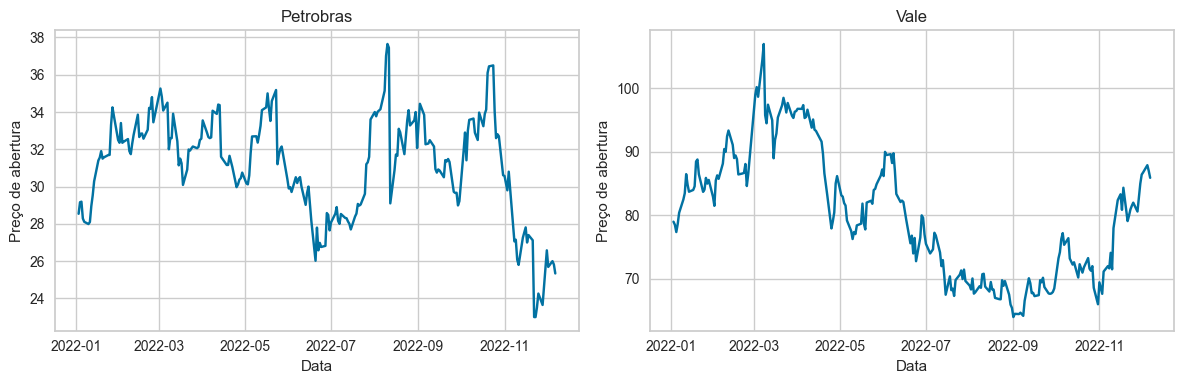

In [351]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(df['Open']['PETR4.SA'])
axs[0].set_title('Petrobras')
axs[0].set_xlabel('Data')
axs[0].set_ylabel('Preço de abertura')

axs[1].plot(df['Open']['VALE3.SA'])
axs[1].set_title('Vale')
axs[1].set_xlabel('Data')
axs[1].set_ylabel('Preço de abertura')

plt.tight_layout()

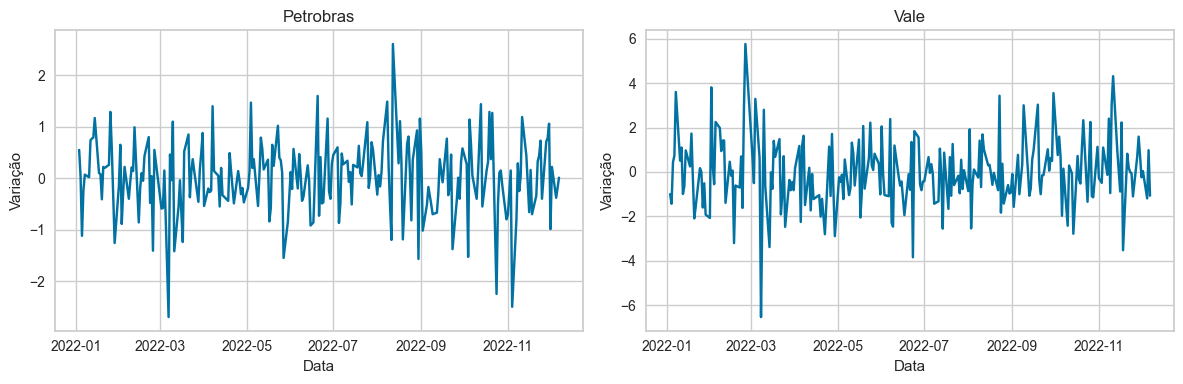

In [352]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

movement_df = df['Close'] - df['Open']

axs[0].plot(movement_df['PETR4.SA'])
axs[0].set_title('Petrobras')
axs[0].set_xlabel('Data')
axs[0].set_ylabel('Variação')

axs[1].plot(movement_df['VALE3.SA'])
axs[1].set_title('Vale')
axs[1].set_xlabel('Data')
axs[1].set_ylabel('Variação')

plt.tight_layout()

In [353]:
movement_df.head(3)

Symbols,PETR4.SA,VALE3.SA,OIBR4.SA,CSNA3.SA,BBAS3.SA,ITUB4.SA,ELET3.SA,IBMB34.SA,VIVT3.SA,HOND34.SA
Date,,,,,,,,,,
2022-01-03,0.549999,-1.000000,-0.01,-0.879999,-0.309999,0.340000,-0.809998,17.830017,-0.359997,1.380005
2022-01-04,0.040001,-1.430000,-0.03,-0.720001,-0.270000,0.500000,-0.689999,15.150024,0.250000,3.639999
2022-01-05,-1.120001,0.439995,-0.02,-0.660000,-0.449999,-0.389999,0.009998,16.099976,0.209999,-0.009995


In [354]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)

In [357]:
movement_df.T

Date,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14,...,2022-11-24,2022-11-25,2022-11-28,2022-11-29,2022-11-30,2022-12-01,2022-12-02,2022-12-05,2022-12-06,2022-12-07
Symbols,,,,,,,,,,,,,,,,,,,,,
PETR4.SA,0.549999,0.040001,-1.120001,-0.240002,0.070000,0.020000,0.740000,0.769999,0.789999,1.170000,...,0.730000,-0.400000,0.710001,0.779999,1.059999,-0.990000,0.219999,-0.379999,-0.180000,0.010000
VALE3.SA,-1.000000,-1.430000,0.439995,0.739998,3.599998,0.510002,1.099998,-0.989998,-0.639999,0.970001,...,-0.060005,-1.099998,0.700005,1.590004,0.709999,-0.239998,0.040001,-1.190002,0.980003,-1.070007
OIBR4.SA,-0.010000,-0.030000,-0.020000,0.010000,0.010000,0.020000,0.030000,0.060000,0.010000,0.010000,...,-0.010000,0.010000,-0.010000,-0.010000,-0.020000,0.000000,-0.010000,-0.020000,-0.020000,0.000000
CSNA3.SA,-0.879999,-0.720001,-0.660000,-0.630001,0.740002,1.100000,0.060001,0.880001,0.370001,-0.290001,...,0.240000,-0.050000,-0.490001,0.850000,0.110001,-0.140000,-0.050000,-0.260000,0.110000,0.020000
BBAS3.SA,-0.309999,-0.270000,-0.449999,0.180000,0.019999,0.240000,0.180000,0.260000,0.590000,0.709999,...,0.430000,-0.900002,0.440002,0.250000,-0.139999,0.120003,0.500000,-0.750000,0.170002,-0.119999
ITUB4.SA,0.340000,0.500000,-0.389999,0.500000,0.539999,0.270000,0.559999,-0.010000,0.590000,-0.070000,...,0.740000,-0.790001,-0.580000,0.199999,0.200001,0.369999,0.260000,-0.580000,0.430000,-0.260000
ELET3.SA,-0.809998,-0.689999,0.009998,-0.219999,-1.139999,-0.820000,0.430000,0.869999,0.010000,0.260000,...,1.119999,-1.299999,0.420002,0.980000,0.959999,-0.890003,-2.259998,-0.150002,-0.099998,0.549999
IBMB34.SA,17.830017,15.150024,16.099976,-0.739990,-9.609985,4.929993,-23.070007,-5.919983,3.809998,-27.279968,...,0.000000,3.949951,-17.380005,0.000000,7.789978,4.679993,0.000000,2.359985,-0.009949,0.000000
VIVT3.SA,-0.359997,0.250000,0.209999,-0.590000,-0.400002,0.570000,0.130001,0.109997,0.590000,-0.149998,...,0.410000,-0.600002,-0.289997,-0.140003,-0.389999,0.560001,0.899998,-0.529999,-0.189999,-0.240002


Text(0, 0.5, 'Euclidean Distance')

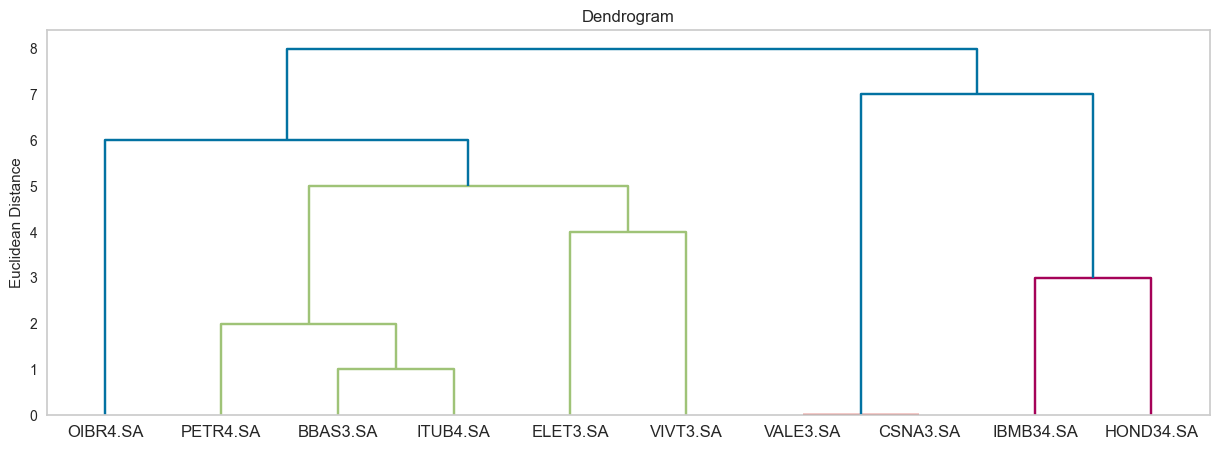

In [356]:
data = movement_df.T.dropna()

normalizer = Normalizer()
cluster = AgglomerativeClustering(n_clusters=3)
pipeline = make_pipeline(normalizer, cluster)
labels = pipeline.fit_predict(data.values)

# pd.DataFrame({'labels': labels, 'companies': list(data.index.tolist())}).sort_values(by=['labels'], axis=0)

plt.figure(figsize=(15, 5))
plt.grid(False)
plot_dendrogram(cluster, labels=list(data.index.tolist()))
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

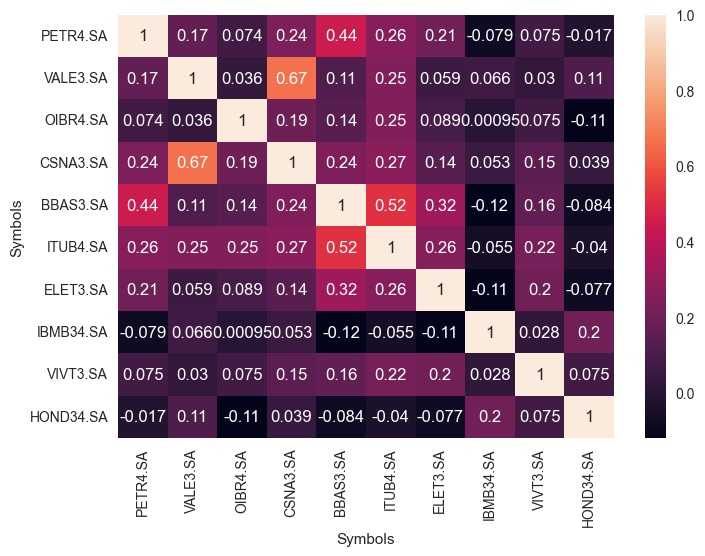

In [360]:
data = movement_df.corr()
sns.heatmap(data, annot=True)

Text(0, 0.5, 'Euclidean Distance')

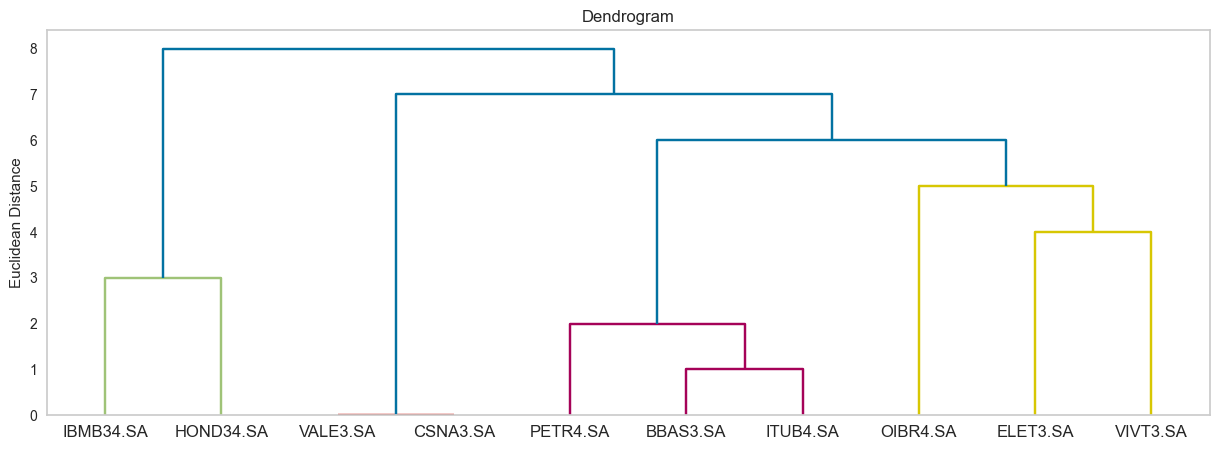

In [362]:
cluster = AgglomerativeClustering(n_clusters=3)
pipeline = make_pipeline(cluster)
labels = pipeline.fit_predict(data.values)

#pd.DataFrame({'labels': labels, 'companies': list(data.index.tolist())}).sort_values(by=['labels'], axis=0)

plt.figure(figsize=(15, 5))
plt.grid(False)
plot_dendrogram(cluster, labels=list(data.index.tolist()))
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

In [363]:
data = pd.DataFrame(0, columns=movement_df.columns.tolist(), index=movement_df.columns.tolist())
data

,PETR4.SA,VALE3.SA,OIBR4.SA,CSNA3.SA,BBAS3.SA,ITUB4.SA,ELET3.SA,IBMB34.SA,VIVT3.SA,HOND34.SA
PETR4.SA,0,0,0,0,0,0,0,0,0,0
VALE3.SA,0,0,0,0,0,0,0,0,0,0
OIBR4.SA,0,0,0,0,0,0,0,0,0,0
CSNA3.SA,0,0,0,0,0,0,0,0,0,0
BBAS3.SA,0,0,0,0,0,0,0,0,0,0
ITUB4.SA,0,0,0,0,0,0,0,0,0,0
ELET3.SA,0,0,0,0,0,0,0,0,0,0
IBMB34.SA,0,0,0,0,0,0,0,0,0,0
VIVT3.SA,0,0,0,0,0,0,0,0,0,0
HOND34.SA,0,0,0,0,0,0,0,0,0,0


In [375]:
tickers = data.index.tolist()
for i in range(data.index.size):
    for j in range(data.index.size):
        data.iloc[i, j] = np.nanmax(
            [movement_df[tickers[i]].corr(movement_df[tickers[j]].shift(lag)) for lag in range(-30, 30)]
        )

<AxesSubplot:>

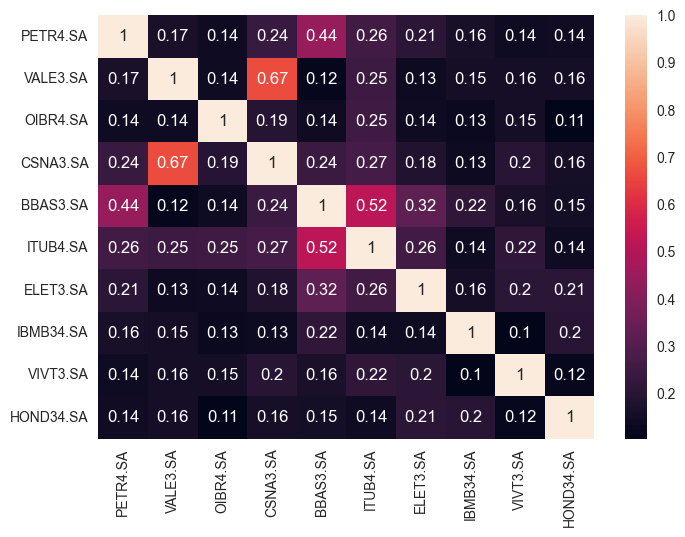

In [377]:
sns.heatmap(data, annot=True)

Text(0, 0.5, 'Euclidean Distance')

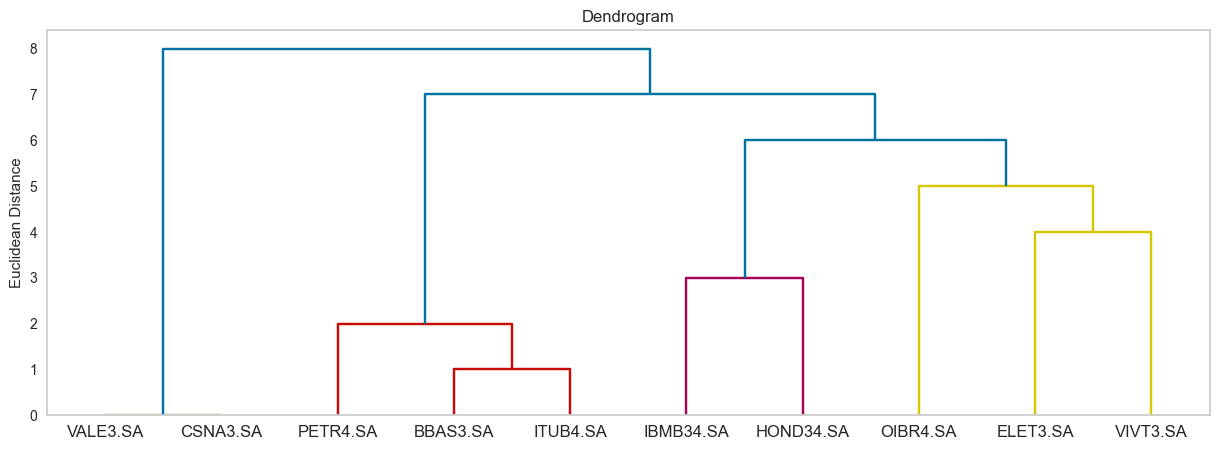

In [378]:
cluster = AgglomerativeClustering(n_clusters=3)
pipeline = make_pipeline(cluster)
labels = pipeline.fit_predict(data.values)

#pd.DataFrame({'labels': labels, 'companies': list(data.index.tolist())}).sort_values(by=['labels'], axis=0)

plt.figure(figsize=(15, 5))
plt.grid(False)
plot_dendrogram(cluster, labels=list(data.index.tolist()))
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

### Extra: Processamento de texto

In [390]:
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=['alt.atheism',], shuffle=True, random_state=42)

print ('{} documents'.format(len(twenty_train.data)))
print ()
print(twenty_train.data[0])

480 documents

From: darice@yoyo.cc.monash.edu.au (Fred Rice)
Subject: Re: Islam & Dress Code for women
Organization: Monash University, Melb., Australia.
Lines: 120

In <16BA7103C3.I3150101@dbstu1.rz.tu-bs.de> I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau) writes:

>In article <1993Apr5.091258.11830@monu6.cc.monash.edu.au>
>darice@yoyo.cc.monash.edu.au (Fred Rice) writes:
> 
>(Deletion)
>>>>Of course people say what they think to be the religion, and that this
>>>>is not exactly the same coming from different people within the
>>>>religion.  There is nothing with there existing different perspectives
>>>>within the religion -- perhaps one can say that they tend to converge on
>>>>the truth.
>>
>>>My point is that they are doing a lot of harm on the way in the meantime.
>>>
>>>And that they converge is counterfactual, religions appear to split and
>>>diverge. Even when there might be a 'True Religion' at the core, the layers
>>>above determine what happens in practise, and they are qui

In [430]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english', ngram_range=(1, 3), min_df=0.1, max_df=0.9)
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(480, 181)

In [431]:
doc_1 = pd.DataFrame(
    X_train_counts[0].todense(), columns=count_vect.get_feature_names_out()
)
doc_1

,accept,actually,agree,allan,allan schneider,allan schneider subject,argument,article,atheism,atheist,...,world,wpd,wpd sgi,wpd sgi com,writes,writes article,wrong,wrote,years,yes
0,0,0,0,0,0,0,2,1,0,0,...,0,0,0,0,2,1,0,0,0,1


In [432]:
doc_1.T[doc_1.T > 0].dropna().sort_values(by=0, ascending=False).head(10)

,0
say,7.0
think,6.0
people,6.0
islam,5.0
try,5.0
does,5.0
religion,5.0
edu,4.0
god,4.0
don,3.0


## Aulas 05 e 06 - Medidas de Qualidade

In [441]:
from sklearn import metrics

In [457]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN

In [443]:
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)

X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, 
                  n_features = num_classes, center_box=(0, 1), cluster_std = 1.5, random_state=42)

X = StandardScaler().fit_transform(X)

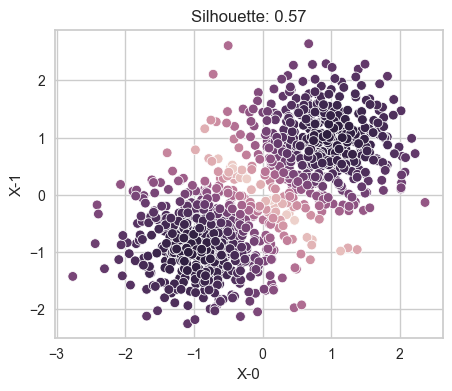

In [444]:
km = KMeans(n_clusters=2).fit(X)

cluster_df = pd.DataFrame(X, columns=['X-{}'.format(i) for i in range(num_classes)]).assign(cluster=km.labels_)
cluster_df = cluster_df.assign(silhouette=metrics.silhouette_samples(X, km.labels_, metric='euclidean'))
silhouette_score = metrics.silhouette_score(X, km.labels_, metric='euclidean')

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
sns.scatterplot(x="X-0", y="X-1", hue="silhouette", data=cluster_df, ax=ax, legend=None)
ax.set_title('Silhouette: {:.2f}'.format(silhouette_score));

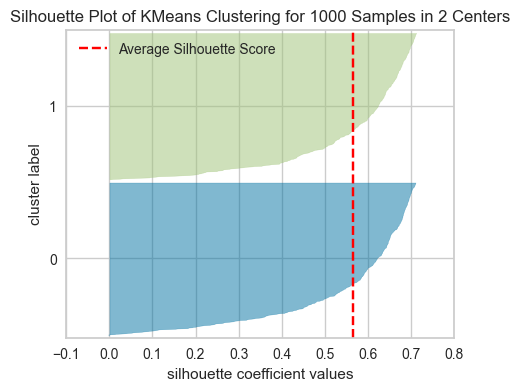

In [448]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

visualizer = SilhouetteVisualizer(km, ax=ax, colors='yellowbrick')
visualizer.fit(X)
visualizer.show();

-0.7251251239451049 -0.16405361447691721


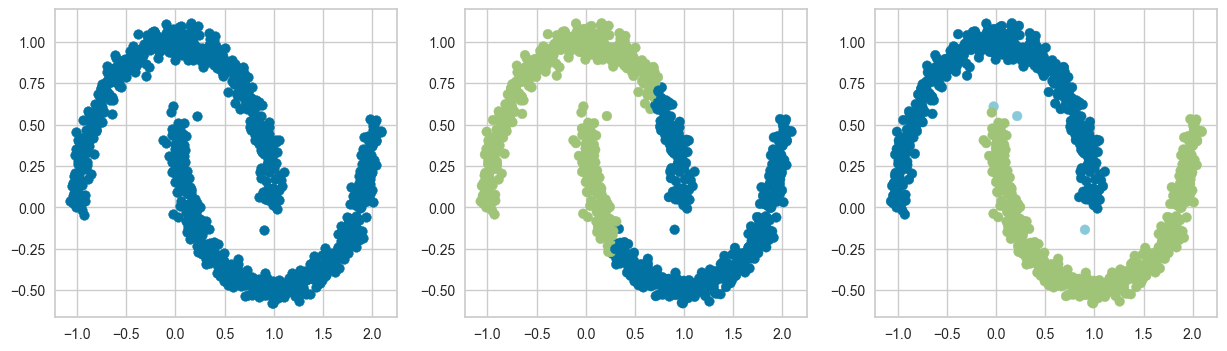

In [473]:
#!pip install git+https://github.com/christopherjenness/DBCV.git@master
from DBCV import DBCV

noisy_moons = make_moons(n_samples=1000, noise=.05)
X = noisy_moons[0]

kmeans =  KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X)

dbscan =  DBSCAN(eps=.1)
dbscan_labels = dbscan.fit_predict(X)

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].scatter(X[:,0], X[:,1])
axs[1].scatter(X[:,0], X[:,1], c=[sns.color_palette().as_hex()[l] for l in kmeans_labels])
axs[2].scatter(X[:,0], X[:,1], c=[sns.color_palette().as_hex()[l] for l in dbscan_labels])

kmeans_score = DBCV(X, kmeans_labels, dist_function=euclidean)
dbscan_score = DBCV(X, dbscan_labels, dist_function=euclidean)
print(kmeans_score, dbscan_score)

### Estudo de Caso: USArrests

In [474]:
df = pd.read_csv("USArrests.csv", sep=',', index_col=0)
df.head(6)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [475]:
X = StandardScaler().fit_transform(df)

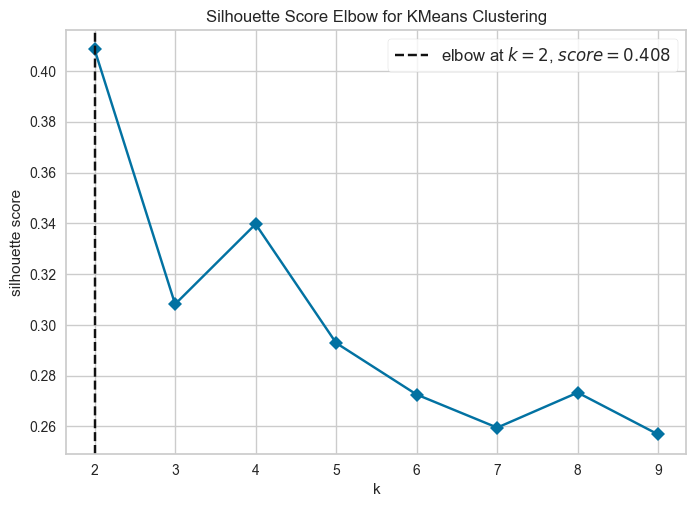

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [477]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(
    km, k=(2,10), metric='silhouette', timings=False
)

visualizer.fit(X)        
visualizer.show()        

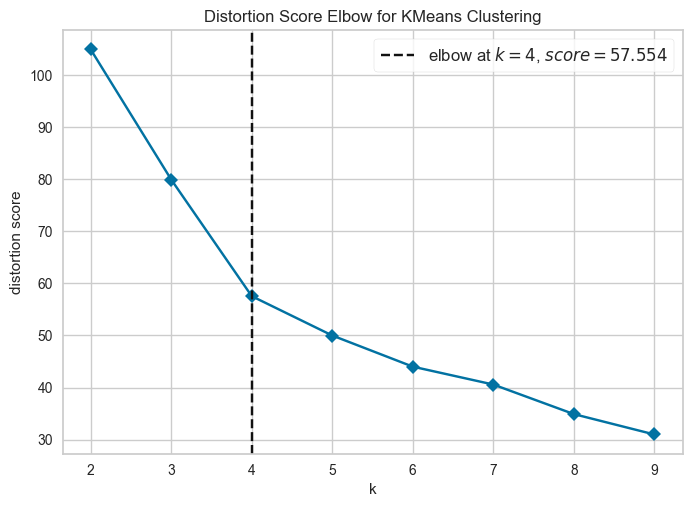

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [478]:
km = KMeans()
visualizer = KElbowVisualizer(
    km, k=(2,10), metric='distortion', timings=False
)
visualizer.fit(X)        
visualizer.show()        

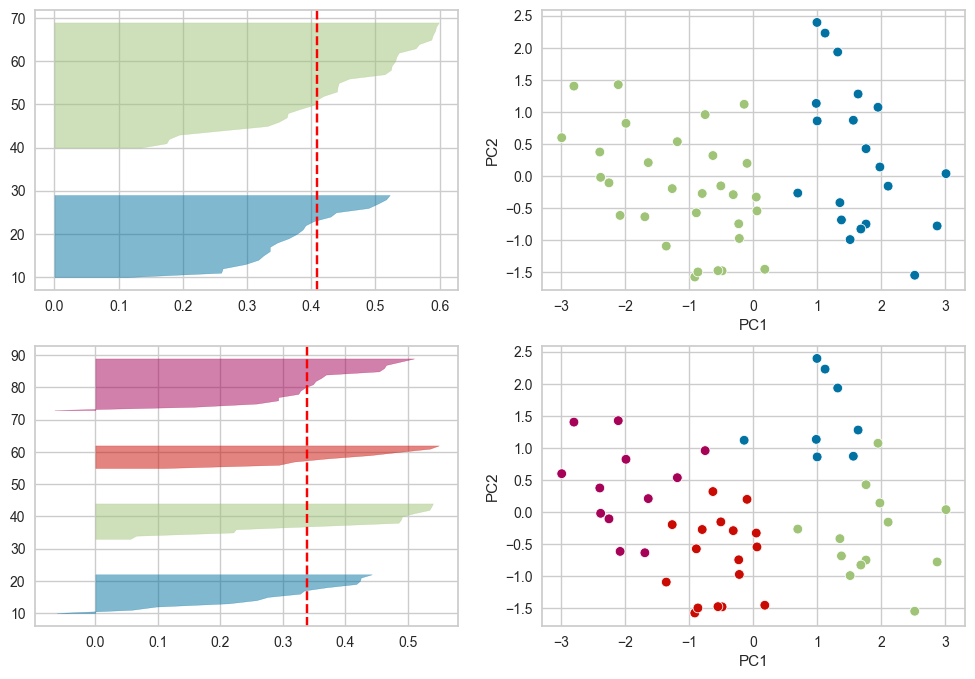

In [483]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

km_2 = KMeans(n_clusters=2)
visualizer = SilhouetteVisualizer(km_2, ax=axs[0, 0], colors='yellowbrick')
visualizer.fit(X)

plot_cluster_points(X, km_2.labels_, 
        hue=list(map(lambda x: sns.color_palette().as_hex()[x], km_2.labels_)), legend=False, ax=axs[0, 1])

km_4 = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(km_4, ax=axs[1, 0], colors='yellowbrick')
visualizer.fit(X)

plot_cluster_points(X, km_4.labels_, 
        hue=list(map(lambda x: sns.color_palette().as_hex()[x], km_4.labels_)), legend=False, ax=axs[1, 1])

In [486]:
df_km4 = df.copy()
df_km4['cluster'] = km_4.labels_
df_km4['silhouette'] = metrics.silhouette_samples(X, km_4.labels_, metric='euclidean')

df_km4.head()

,Murder,Assault,UrbanPop,Rape,cluster,silhouette
Alabama,13.2,236,58,21.2,2,0.485775
Alaska,10.0,263,48,44.5,0,0.058252
Arizona,8.1,294,80,31.0,0,0.423638
Arkansas,8.8,190,50,19.5,2,0.110329
California,9.0,276,91,40.6,0,0.442573


In [489]:
df_km4.sort_values(by='silhouette').head(2)

,Murder,Assault,UrbanPop,Rape,cluster,silhouette
Nebraska,4.3,102,62,16.5,3,-0.065536
Missouri,9.0,178,70,28.2,0,-0.061912


In [490]:
df_km4.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape,silhouette
cluster,,,,,
0,10.815385,257.384615,76.000000,33.192308,0.275578
1,3.541667,76.583333,51.250000,11.816667,0.376080
2,13.937500,243.625000,53.750000,21.412500,0.388131
3,5.576471,136.705882,73.176471,18.647059,0.337422


### Estudo de Caso: Iris

In [126]:
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [127]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [128]:
iris_df.groupby('species').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


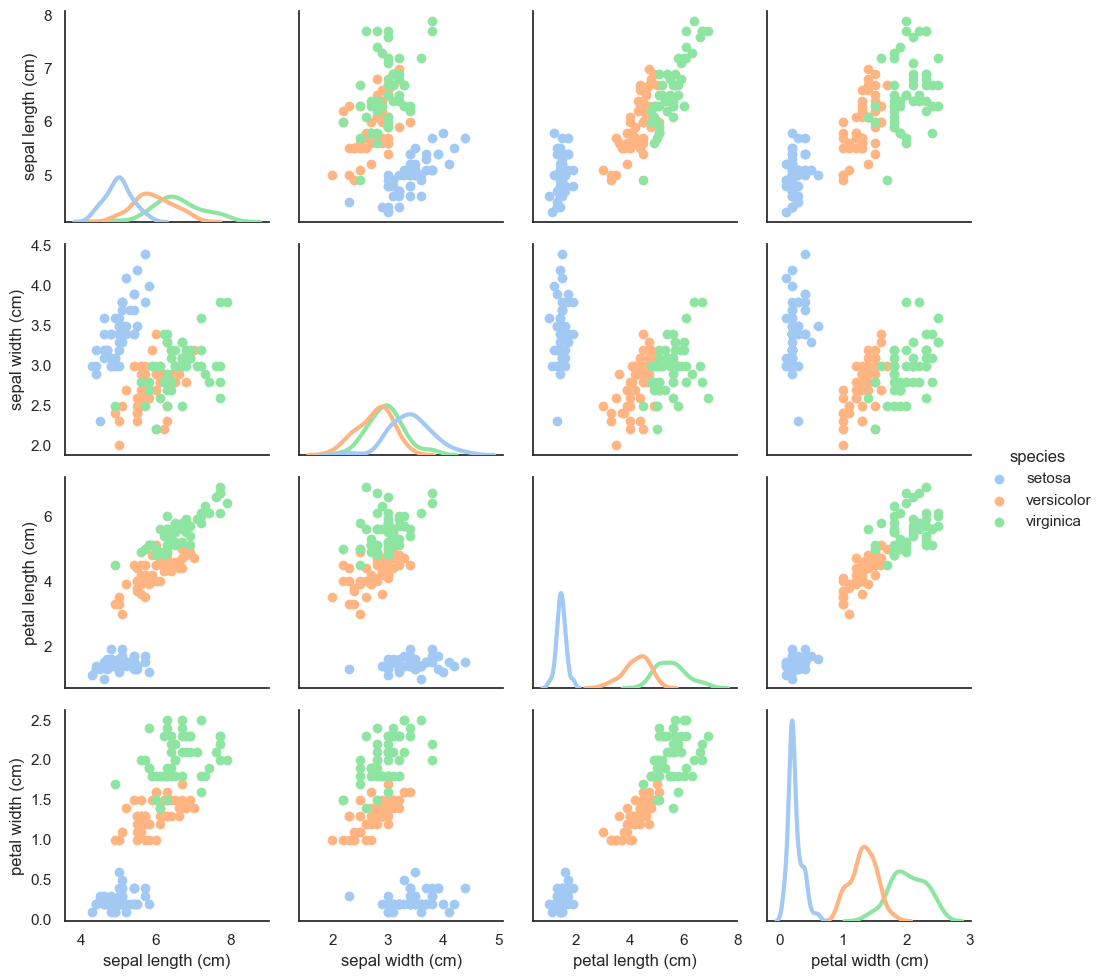

In [129]:
g = sns.PairGrid(iris_df, vars=iris.feature_names, hue='species')
g.map_diag(sns.kdeplot, lw=3)
g.map_offdiag(plt.scatter)
#g.map(plt.scatter) todas as celulas serao scatter.
g.add_legend()

In [140]:
X = (iris.data - iris.data.mean(axis=0)) / iris.data.std(axis=0)

In [142]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X)

iris_df['kmeans_cluster'] = kmeans_model.labels_

In [143]:
confusion_matrix(iris.target, iris_df['kmeans_cluster'])

array([[ 0, 50,  0],
       [11,  0, 39],
       [36,  0, 14]])

Text(0.5, 1.0, 'Cores segundo KMeans')

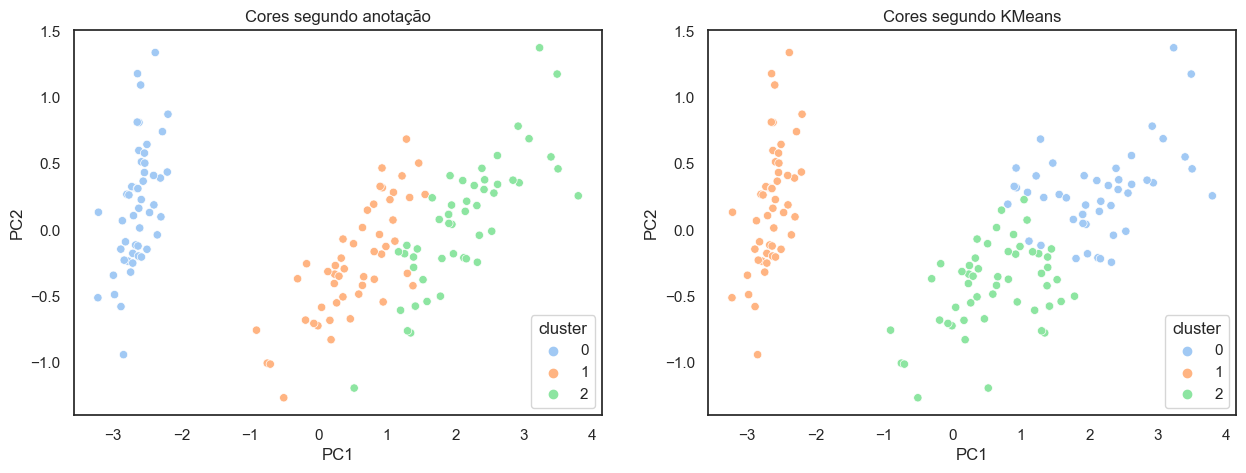

In [150]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plot_cluster_points(iris_df[iris.feature_names], iris.target, ax=axs[0])
axs[0].set_title('Cores segundo anotação')
plot_cluster_points(iris_df[iris.feature_names], kmeans_model.labels_, ax=axs[1])
axs[1].set_title('Cores segundo KMeans')